In [101]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Constants from the AtoModel
metadata= {
    'MEAN_TEMP_A': 70.070907,
    'MEAN_TIME_A': 1.069273,
    'STD_TEMP_A': 15.944285,
    'STD_TIME_A': 0.106324,
    'COLD_A': (-1.003117, 1.003117),
    'WARM_A': (0.996716, -0.996716),
    'T_IN_A': 50,
    'T_OUT_A': 81,
    'MEAN_TEMP_Y': 41.777564,
    'MEAN_IRD_Y': 810.124836,
    'STD_TEMP_Y': 25.685219,
    'STD_IRD_Y': 337.399184,
    'T_IN_Y': 60,
    'T_OUT_Y': 121,
    'NOON_TIME': 180,
    'NOON_IRD': (1508.0, 400.0)
}

run= {
    'cycles_A': 0,
    'state': 0,
    'cycles_Y':0,
    'stage': 1
}

atoModel= tf.keras.models.load_model('AtoModel.keras')
yuriModel= tf.keras.models.load_model('YuriModel.keras')

def changeState()-> None:
    run['state'] = (run['state'] + 1) % 2
    if run['state'] == 1:
        if run['stage'] == 0:
            run['cycles_A'] += 1
        else:
            run['cycles_Y'] += 1

def step(t: float)-> float:
    if run['stage'] == 0:
        t_norm = (t - metadata['MEAN_TEMP_A']) / metadata['STD_TEMP_A']
        m= (1 - metadata['MEAN_TIME_A'])/ metadata['STD_TIME_A']
        if run['state'] == 0:
            t_next = atoModel.predict(tf.constant([[m, t_norm, metadata['WARM_A'][0], metadata['WARM_A'][1]]]), verbose=0).flatten()[0]
            if t_next > metadata['T_OUT_A']:
                changeState()
        else:
            t_next = atoModel.predict(tf.constant([[m, t_norm, metadata['COLD_A'][0], metadata['COLD_A'][1]]]), verbose=0).flatten()[0]
            if t_next < metadata['T_IN_A']:
                changeState()
        return t_next
    else:
        t_norm = (t - metadata['MEAN_TEMP_Y']) / metadata['STD_TEMP_Y']
        if run['state'] == 0:
            ird_norm= (metadata['NOON_IRD'][0] - metadata['MEAN_IRD_Y']) / metadata['STD_IRD_Y']
        else:
            ird_norm= (metadata['NOON_IRD'][1] - metadata['MEAN_IRD_Y']) / metadata['STD_IRD_Y']
        if run['state'] == 0:
            t_next = yuriModel.predict(tf.constant([[ird_norm, t_norm]]), verbose=0).flatten()[0]
            if t_next > metadata['T_OUT_Y']:
                changeState()
        else:
            t_next = yuriModel.predict(tf.constant([[ird_norm, t_norm]]), verbose=0).flatten()[0]
            if t_next < metadata['T_IN_Y']:
                changeState()
        return t_next

In [102]:
t = 26
x = list(range(0, 60*6))
y= []
for i in x:
    if i > metadata['NOON_TIME'] and run['stage'] == 1:
        run['stage'] = 0
    y.append(t)
    t = step(t)

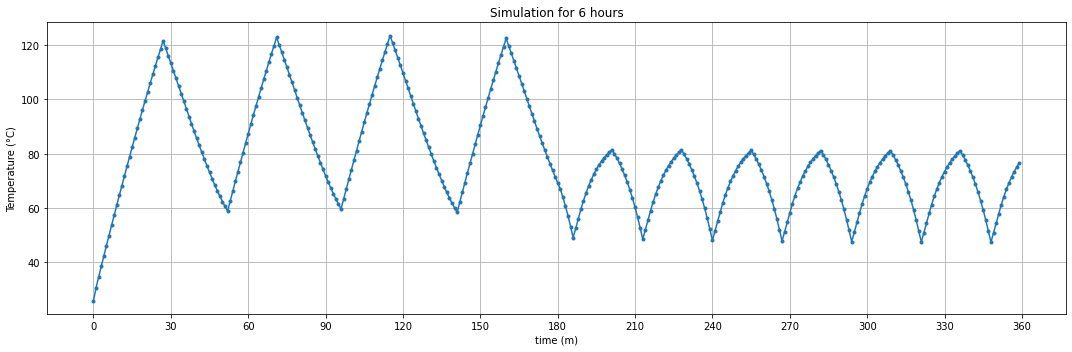

In [106]:
import numpy as np
plt.figure(figsize=(15,5))
plt.plot(x, y, marker='.')

plt.xlabel("time (m)")
plt.ylabel("Temperature (°C)")
plt.title("Simulation for 6 hours")
plt.xticks(np.arange(0, 370, 30))
plt.tight_layout()

plt.grid(True)
plt.show()

In [104]:
from datetime import datetime, timedelta

# Generate an array with times from 09:00 to 15:00 in hh:mm format
start_time = datetime.strptime("07:30", "%H:%M")
end_time = datetime.strptime("16:00", "%H:%M")
time_step = timedelta(minutes=1)

times = []
current_time = start_time

while current_time <= end_time:
    times.append(current_time.strftime("%H:%M"))
    current_time += time_step

print(times)

['07:30', '07:31', '07:32', '07:33', '07:34', '07:35', '07:36', '07:37', '07:38', '07:39', '07:40', '07:41', '07:42', '07:43', '07:44', '07:45', '07:46', '07:47', '07:48', '07:49', '07:50', '07:51', '07:52', '07:53', '07:54', '07:55', '07:56', '07:57', '07:58', '07:59', '08:00', '08:01', '08:02', '08:03', '08:04', '08:05', '08:06', '08:07', '08:08', '08:09', '08:10', '08:11', '08:12', '08:13', '08:14', '08:15', '08:16', '08:17', '08:18', '08:19', '08:20', '08:21', '08:22', '08:23', '08:24', '08:25', '08:26', '08:27', '08:28', '08:29', '08:30', '08:31', '08:32', '08:33', '08:34', '08:35', '08:36', '08:37', '08:38', '08:39', '08:40', '08:41', '08:42', '08:43', '08:44', '08:45', '08:46', '08:47', '08:48', '08:49', '08:50', '08:51', '08:52', '08:53', '08:54', '08:55', '08:56', '08:57', '08:58', '08:59', '09:00', '09:01', '09:02', '09:03', '09:04', '09:05', '09:06', '09:07', '09:08', '09:09', '09:10', '09:11', '09:12', '09:13', '09:14', '09:15', '09:16', '09:17', '09:18', '09:19', '09:20', 